In [2]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import neuron
nrn = neuron.h

In [4]:
def return_ball_and_stick_soma():
    """
    Makes a ball-and-stick neuron model.
    :return: soma and dendrite NEURON objects. Both must be returned, or they are lost.
    """

    soma = nrn.Section('soma')
    soma.L = 15  # um; stored as a float number
    soma.diam = 15  # um
    soma.nseg = 1  # stored as an integer

    dend = nrn.Section('dend')
    dend.L = 1000
    dend.diam = 2
    dend.nseg = int(dend.L/10)

    dend.connect(soma, 1, 0)

    for sec in nrn.allsec():
        sec.insert('pas')
        sec.Ra = 100
        sec.cm = 1
        for seg in sec:
            seg.g_pas = 0.00003
            seg.e_pas = -65
    return soma, dend

In [5]:
def insert_current_clamp(input_site):
    """
    Inserts a current clamp in the neuron model
    :param input_site: Where to place the current clamp. Example: soma(0.5), where 0.5 means 'center',
           0 would mean start, and 1 would mean at the end of the segment in question.
    :return: The NEURON object current clamp. This must be returned, otherwise it is lost.
    """
    stim = nrn.IClamp(input_site)
    stim.delay = 10
    stim.amp = 0.0113
    stim.dur = 1e9
    return stim

In [6]:
def run_simulation(record_site):
    """
    Runs the NEURON simulation
    :param record_site: Where to record membrane potential from. Example: soma(0.5), where 0.5 means 'center',
           0 would mean start, and 1 would mean at the end of the segment in question.
    :return: Time and voltage numpy arrays
    """
    rec_t = nrn.Vector()
    rec_t.record(nrn._ref_t)
    rec_v = nrn.Vector()
    rec_v.record(record_site._ref_v)
    neuron.h.dt = 2**-3
    nrn.finitialize(-65)
    neuron.init()
    neuron.run(200)
    return np.array(rec_t), np.array(rec_v)

In [7]:
def exercise_4_1():

    exp_t = np.load('exp_t.npy')
    exp_somav = np.load('exp_v.npy')

    soma_rall, dend_rall = return_ball_and_stick_soma()
    stim = insert_current_clamp(soma_rall(0.5))
    t, v_rall = run_simulation(soma_rall(0.5))

    fig = figure()
    ax1 = fig.add_subplot(111, xlabel="Time [ms]", ylabel="Voltage [mV]")
    ax1.plot(t, exp_somav, 'gray', label='"Experiment"')
    ax1.plot(t, v_rall, 'g', label='Rall')
    legend(loc=4, frameon=False)

    savefig('exercise_4_1_.png')

<IPython.core.display.Javascript object>


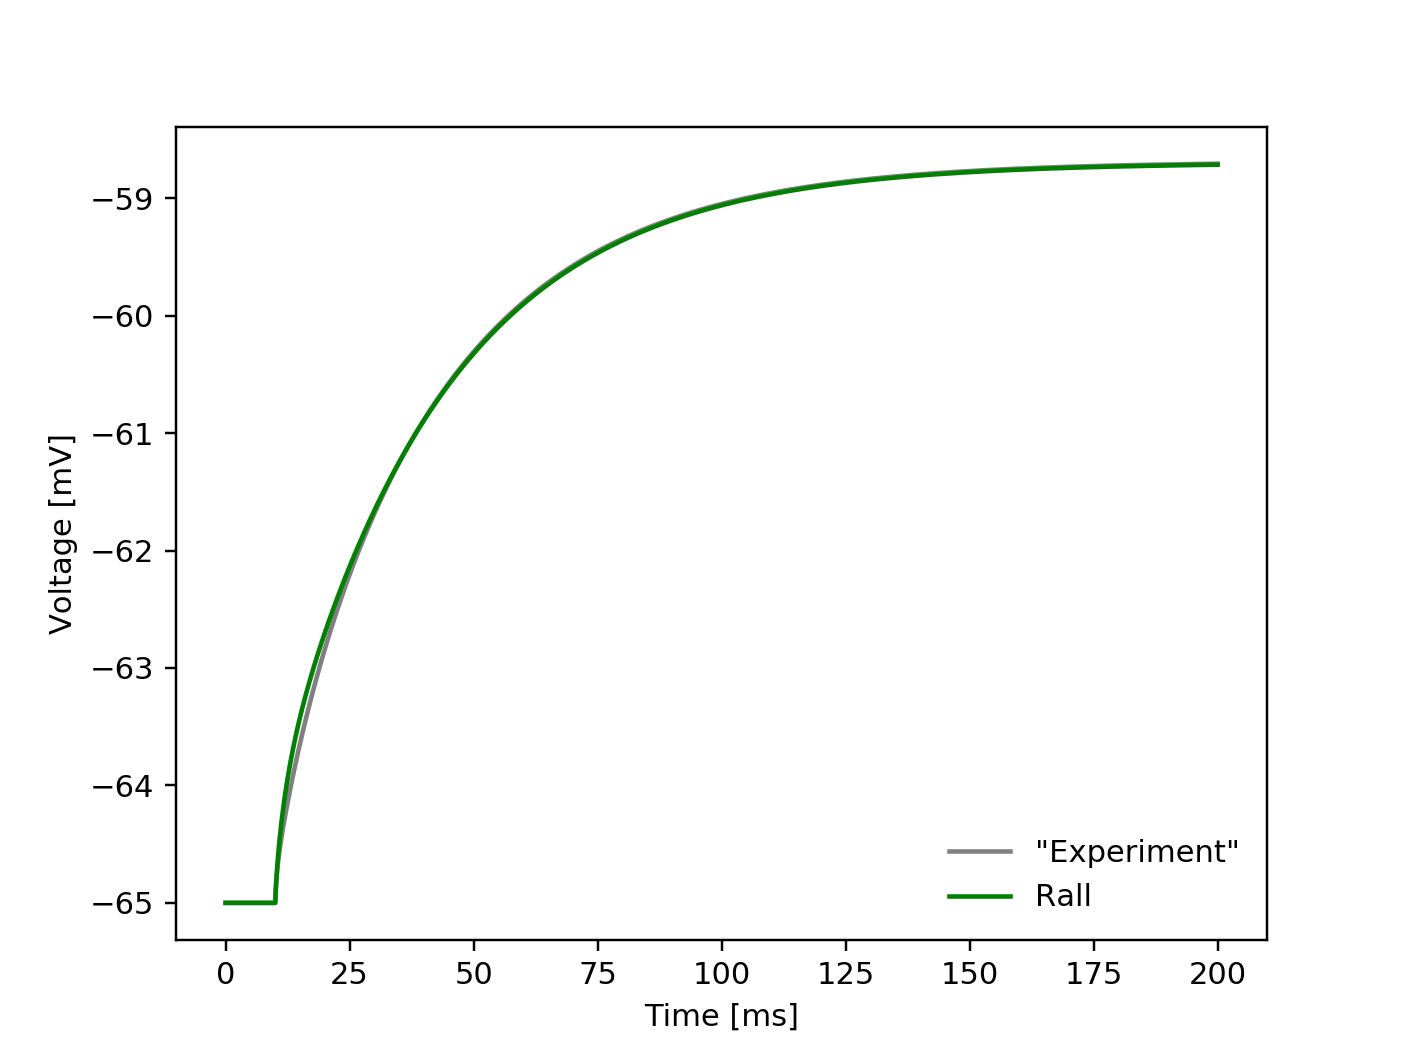

In [8]:
exercise_4_1()